In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load heart disease dataset (assuming it's in CSV format)
# You can replace this with your dataset path
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Define column names based on the dataset description
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset
# data = pd.read_csv(url, header=None, names=columns)
data = pd.read_csv("Heart.csv")
print(data)

# Preprocess the data: handling missing values (represented as '?')
data = data.replace('?', pd.NA)
data = data.dropna()  # Drop rows with missing values

# Convert columns to numeric
# data = data.apply(pd.to_numeric)

# Separate features and target
X = data.drop(['AHD','ChestPain','Thal','Unnamed: 0'], axis=1)  # Features
y = data['AHD']  # Target

# Standardize the data (important for algorithms like KMeans and GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data.head()

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize KMeans with 2 clusters (for binary classification task)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Get the cluster labels
kmeans_labels = kmeans.labels_

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")


K-Means Silhouette Score: 0.16890307972022434


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [28]:
from sklearn.mixture import GaussianMixture

# Initialize Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the model
gmm.fit(X_scaled)

# Get the cluster labels
gmm_labels = gmm.predict(X_scaled)

# Evaluate clustering performance using silhouette score
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"GMM Silhouette Score: {gmm_silhouette}")


GMM Silhouette Score: 0.12989407173626016


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
# Print Inertia for K-means
print(f"K-Means Inertia: {kmeans.inertia_}")

# GMM additional metrics: Log-likelihood, BIC, AIC
print(f"GMM Log-Likelihood: {gmm.score(X_scaled)}")
print(f"GMM BIC: {gmm.bic(X_scaled)}")
print(f"GMM AIC: {gmm.aic(X_scaled)}")

# Compare Silhouette Scores
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")
print(f"Silhouette Score for GMM: {gmm_silhouette}")


K-Means Inertia: 2706.5794700153792
GMM Log-Likelihood: -6.696025945182069
GMM BIC: 4859.967892952567
GMM AIC: 4287.439411438148
Silhouette Score for K-Means: 0.16890307972022434
Silhouette Score for GMM: 0.12989407173626016


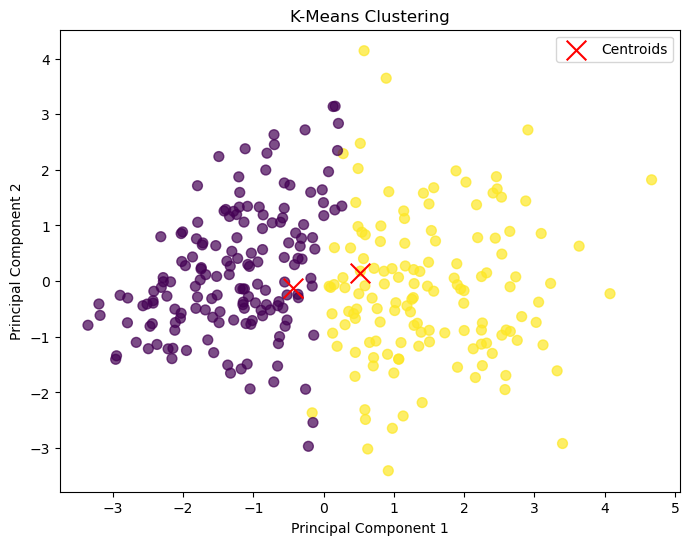

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Plot the K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



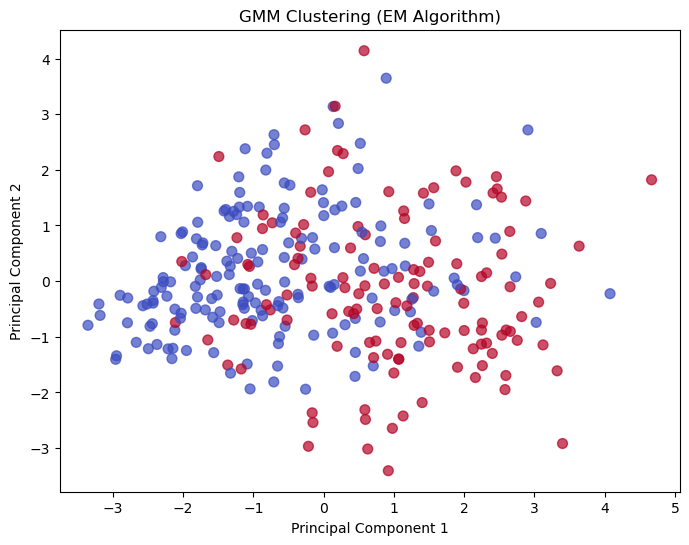

In [31]:
# Plot the GMM clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='coolwarm', s=50, alpha=0.7)
plt.title('GMM Clustering (EM Algorithm)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
